### TSF Assignment - Sparkling Dataset
1. Read the data as an appropriate Time Series data and plot the data.
2
2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.
5
3. Split the data into training and test. The test data should start in 1991.
2
4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.
16
5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.
3
6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.
8
7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.
8
8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.
2
9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.
3
10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.
5
Quality of Business Report
6

## 1. Read the data as an appropriate Time Series data and plot the data. 2

In [2]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import statsmodels

In [4]:
# Import os to set the path
import os

In [5]:
os.chdir('C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Time Series Forecasting\\Assignment_TSF')
os.getcwd()

'C:\\Users\\612598\\OneDrive - Cognizant\\Desktop\\Great Learning\\Time Series Forecasting\\Assignment_TSF'

In [6]:
# Read the CSV file
df_spark=pd.read_csv('Sparkling.csv')

In [8]:
# lets see the first 5 rows of time series
df_spark.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [9]:
# lets see the last 5 rows of time series
df_spark.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [10]:
# Information of time series, There are 187 rows, and 2 columns
df_spark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


In [11]:
# Check for null values, there are no null values.
df_spark.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [12]:
# Describe the time series
df_spark.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


In [13]:
## Here we make an assumption that the date starts and ends as mentioned below

date = pd.date_range(start='15/1/1980', end='15/08/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [14]:
# length of date
len(date)

187

In [15]:
# Creating a new column as Time_Stamp.Adding the time stamp to the data frame
df_spark['Time_Stamp'] = pd.DataFrame(date)
df_spark.head()

,YearMonth,Sparkling,Time_Stamp
0,1980-01,1686,1980-01-31
1,1980-02,1591,1980-02-29
2,1980-03,2304,1980-03-31
3,1980-04,1712,1980-04-30
4,1980-05,1471,1980-05-31


In [16]:
# We will drop YearMonth column
df_spark=df_spark.drop(columns ='YearMonth',axis=1)

In [17]:
# We can see the timestamp is incorporated in dataset, we will make this as index. We only need the column Sparkling Sales.
# Other Time_Stamp will be index column.
df_spark

,Sparkling,Time_Stamp
0,1686,1980-01-31
1,1591,1980-02-29
2,2304,1980-03-31
3,1712,1980-04-30
4,1471,1980-05-31
...,...,...
182,1897,1995-03-31
183,1862,1995-04-30
184,1670,1995-05-31
185,1688,1995-06-30


In [18]:
df_spark.set_index('Time_Stamp',inplace=True)

In [19]:
df_spark

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471
...,...
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670


In [20]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

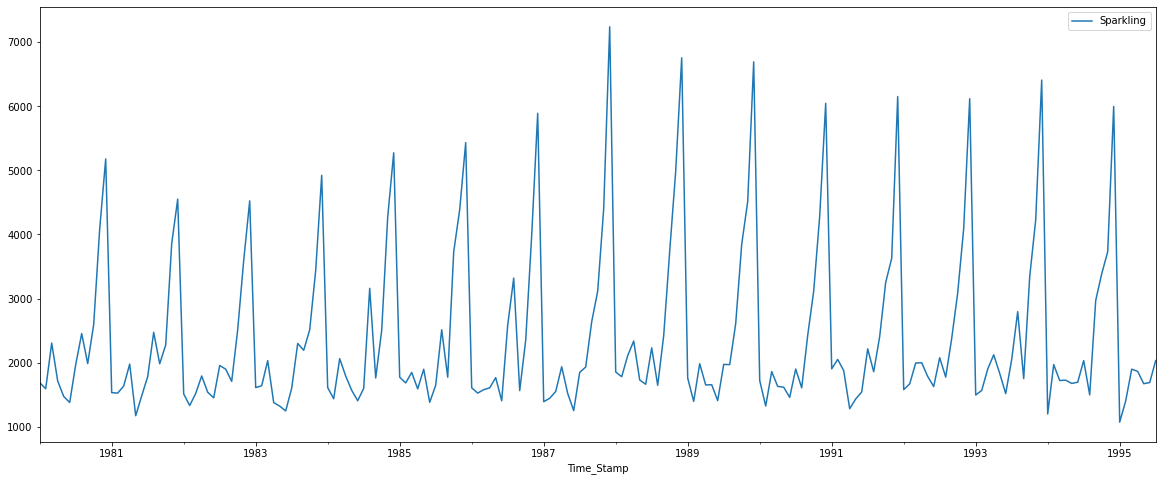

In [21]:
# Lets plot the time series
df_spark.plot()

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition (5)

In above plot we can see some spikes at the end of every year, but we are little bit Confused about trend, like from 1982 to 1987 there is Some positive trend, but from there onwards downward trend.Lets do further EDA to get more insights.

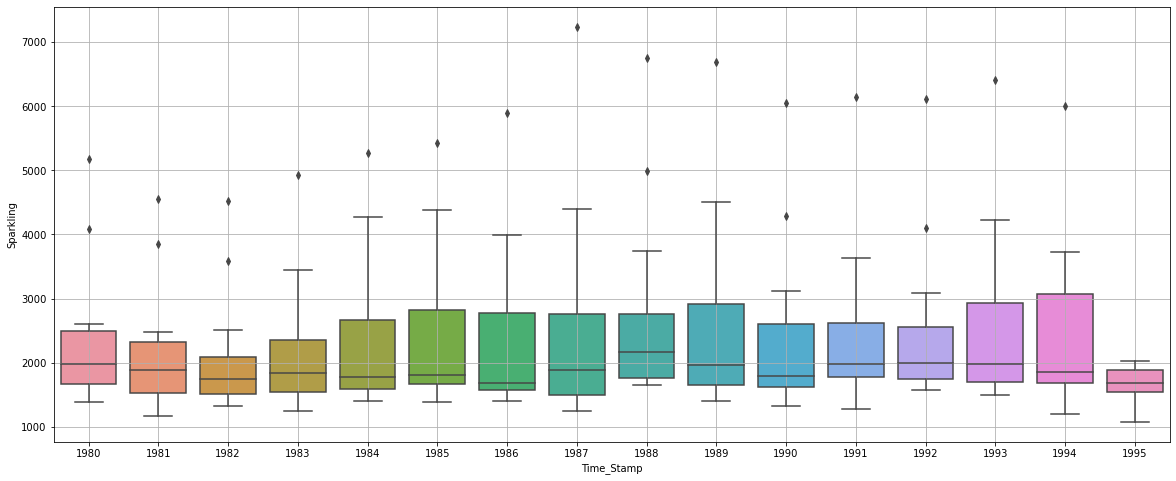

In [22]:
# Yearly plot
sns.boxplot(x=df_spark.index.year,y = df_spark['Sparkling'])
plt.grid();

We can see from above graph the median value for all years is remains around 2000. It means the sales of Sparkling Wine is Almost same over the years, that is not Positive or Negative trend.

Highest Sales of Sparkling wine is occurred in year 1987, and in 1995 one of the month has brought Lowest sale of wines.

Lets check for Monthly plot.

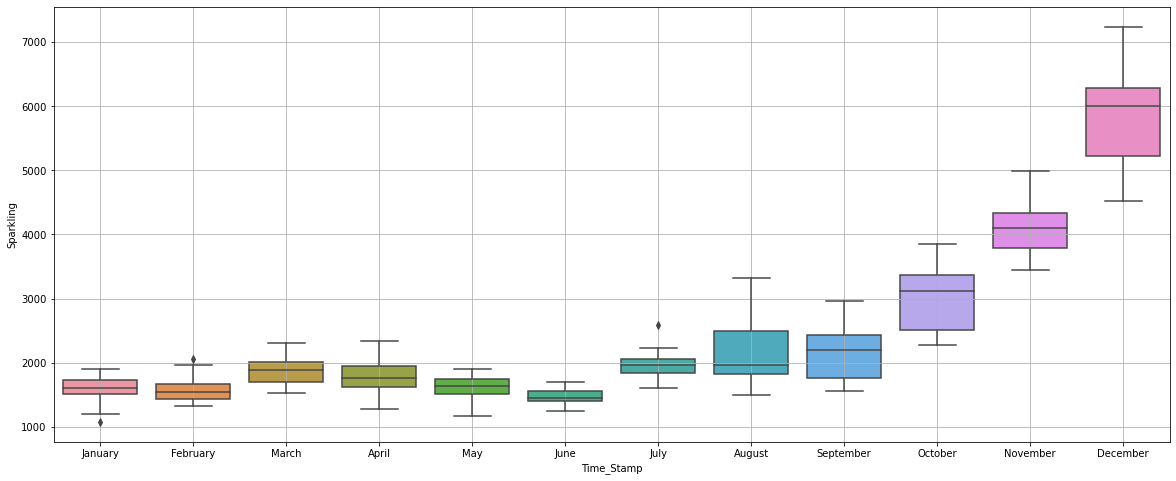

In [23]:
# Monthly plot
sns.boxplot(x = df_spark.index.month_name(),y = df_spark['Sparkling'])
plt.grid();

Yes finally we get Something notable, In above plot Sales has been Increasd from August to December. Till this point Sales are around 2000. so We need Higher stock or Production from August to December.October, November , December has sales more than 2000 and it is almost 3000,4000,6000.

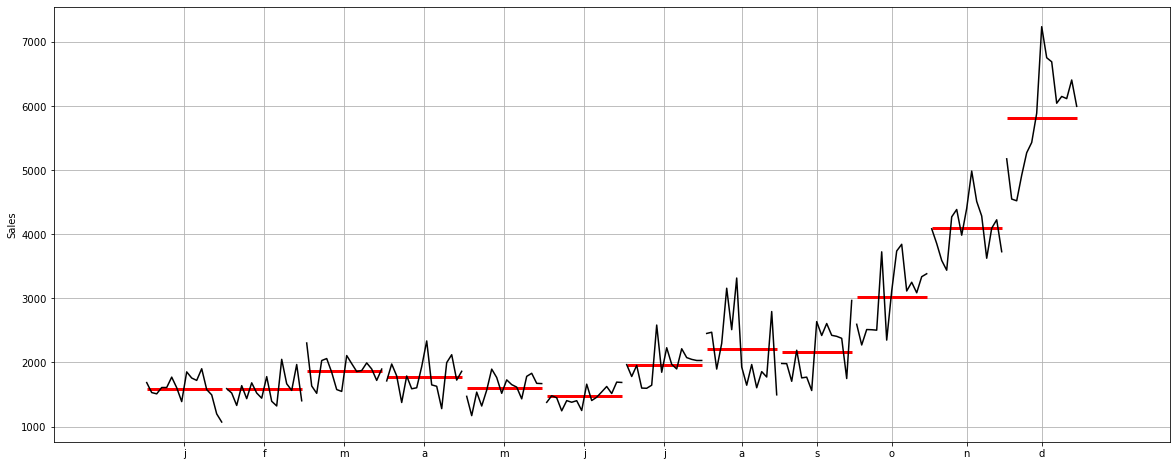

In [24]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_spark['Sparkling'],ylabel='Sales')
plt.grid();

In December we will need the Highest Stock of wines as demand is High. Lets plot and Highlight the highest sales.

In [25]:
## For colouring tables
## Visit https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html    
monthly_sales_across_years = pd.pivot_table(df_spark, values = 'Sparkling', columns = df_spark.index.month, index = df_spark.index.year)
monthly_sales_across_years.style.highlight_max()

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,1686.000000,1591.000000,2304.000000,1712.000000,1471.000000,1377.000000,1966.000000,2453.000000,1984.000000,2596.000000,4087.000000,5179.000000
1981,1530.000000,1523.000000,1633.000000,1976.000000,1170.000000,1480.000000,1781.000000,2472.000000,1981.000000,2273.000000,3857.000000,4551.000000
1982,1510.000000,1329.000000,1518.000000,1790.000000,1537.000000,1449.000000,1954.000000,1897.000000,1706.000000,2514.000000,3593.000000,4524.000000
1983,1609.000000,1638.000000,2030.000000,1375.000000,1320.000000,1245.000000,1600.000000,2298.000000,2191.000000,2511.000000,3440.000000,4923.000000
1984,1609.000000,1435.000000,2061.000000,1789.000000,1567.000000,1404.000000,1597.000000,3159.000000,1759.000000,2504.000000,4273.000000,5274.000000
1985,1771.000000,1682.000000,1846.000000,1589.000000,1896.000000,1379.000000,1645.000000,2512.000000,1771.000000,3727.000000,4388.000000,5434.000000
1986,1606.000000,1523.000000,1577.000000,1605.000000,1765.000000,1403.000000,2584.000000,3318.000000,1562.000000,2349.000000,3987.000000,5891.000000
1987,1389.000000,1442.000000,1548.000000,1935.000000,1518.000000,1250.000000,1847.000000,1930.000000,2638.000000,3114.000000,4405.000000,7242.000000
1988,1853.000000,1779.000000,2108.000000,2336.000000,1728.000000,1661.000000,2230.000000,1645.000000,2421.000000,3740.000000,4988.000000,6757.000000


We can see above, The maximum Sales of Month in a All years.

Monthly sales across the Years.

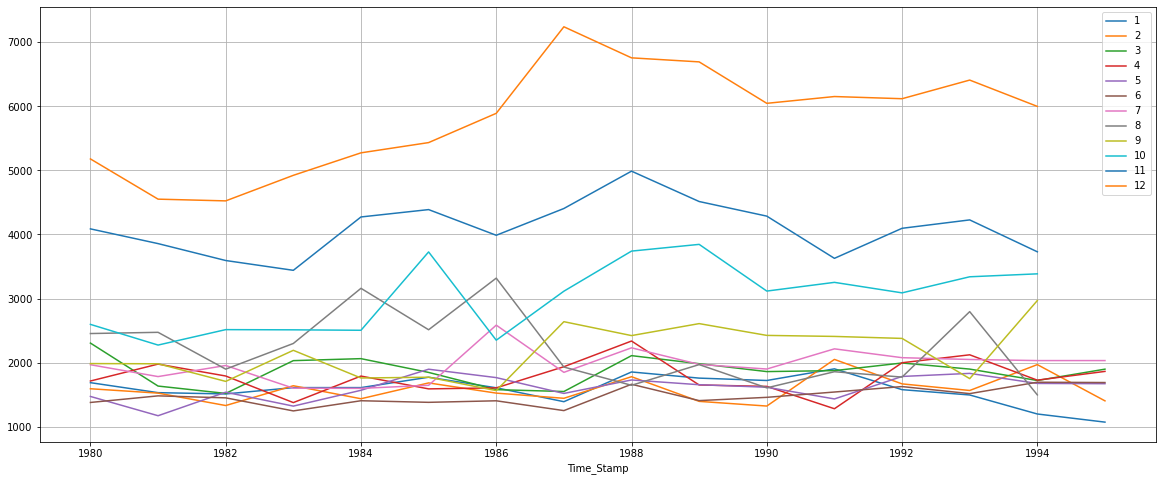

In [25]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

From 9th month sales are going High thats what we can see in above plot, This is true for all the mentioned time series.
In The Year the 1987 December the Sales are Highest it can be seen.

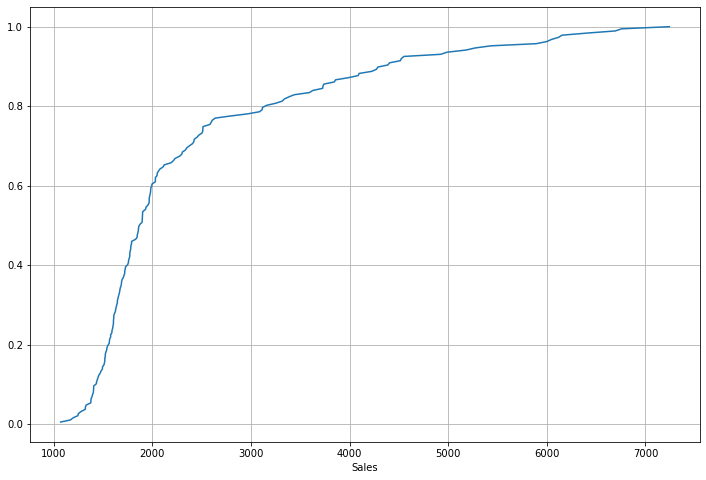

In [26]:
# Plot the Empirical Cumulative Distribution.
# statistics


from statsmodels.distributions.empirical_distribution import ECDF
statsmodels.__version__
plt.figure(figsize = (12, 8))
cdf = ECDF(df_spark['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

This particular graph tells us what percentage of data points refer to what number of Sales. 60% of the sales are below 2000. Maximum sales is greater than 7000. Only 20% of whole data tells us that sales are more than 3000-6000.

#### Plot the average RetailSales per month and the month on month percentage change of RetailSales

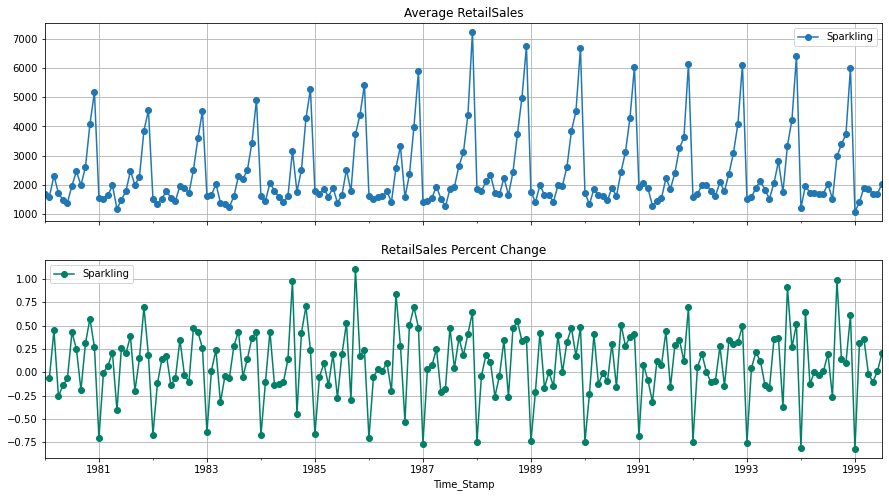

In [27]:
# group by date and get average RetailSales, and precent change
average    = df_spark.groupby(df_spark.index)["Sparkling"].mean()
pct_change = df_spark.groupby(df_spark.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average RetailSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="RetailSales Percent Change",grid=True)

#### Decompose the Time Series and plot the different components.

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

##### Additive Decomposition : 

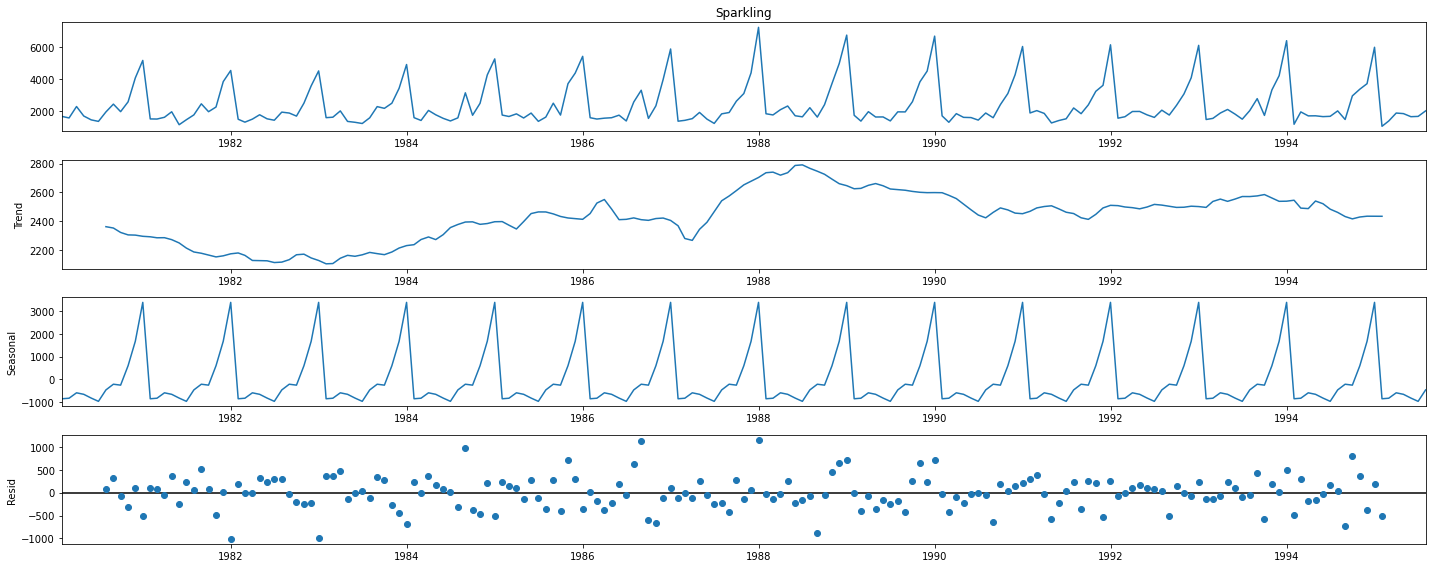

In [29]:
decomposition = seasonal_decompose(df_spark['Sparkling'],model='additive')
decomposition.plot();

We were not Clear about the trend and Seasonality, but here one thing we can notice There is strong Seasonality, Positive Negative trends. One more thing to Notice in Additive Decomposition the Residuals are showing patterns, it is not permissible actually not a good choice, but before saying anything lets move to Multiplicative Decomposition

##### Multiplicative Decomposition

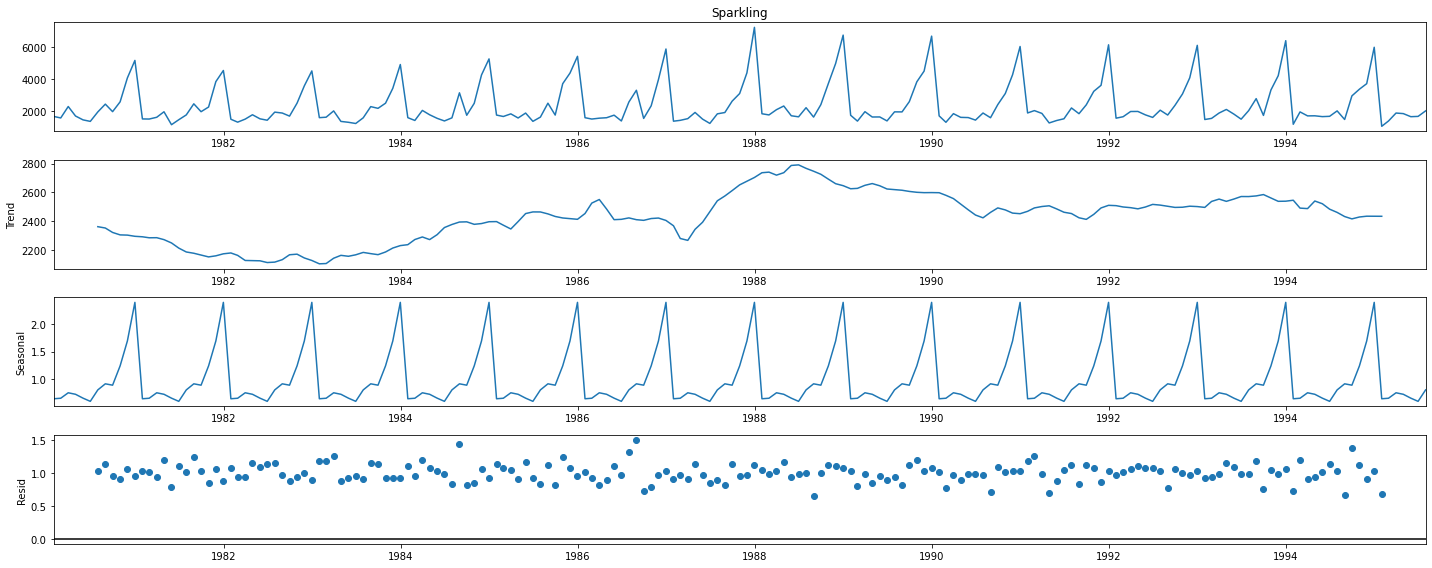

In [30]:
decomposition = seasonal_decompose(df_spark['Sparkling'],model='multiplicative')
decomposition.plot();

Almost Same Trend And Seasonality, Also residual is showing patterns so we will choose Additive decomposition as its alwyas easy to go with Additive Model, why to choose complicate models? when both are giving almost same results.

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

## 3. Split the data into training and test. The test data should start in 1991 (2)

Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [27]:
train=df_spark[df_spark.index.year < 1991]
test=df_spark[df_spark.index.year >= 1991]

Lets Check the Observation count in the Test and Train data.


In [28]:
# Train Data Count 
print('The total Observations in Train data are :',train.count())


The total Observations in Train data are : Sparkling    132
dtype: int64


In [29]:
# test Data Count
print('The total Observations in Test data are :',test.count())


The total Observations in Test data are : Sparkling    55
dtype: int64


In [30]:
train.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


In [31]:
train.tail()

,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


The train data last date is December 1990

For the test data,

In [32]:
test.head()

,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


In [33]:
test.tail()

,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


test data starts at Jan-1991 and It is till July-1995

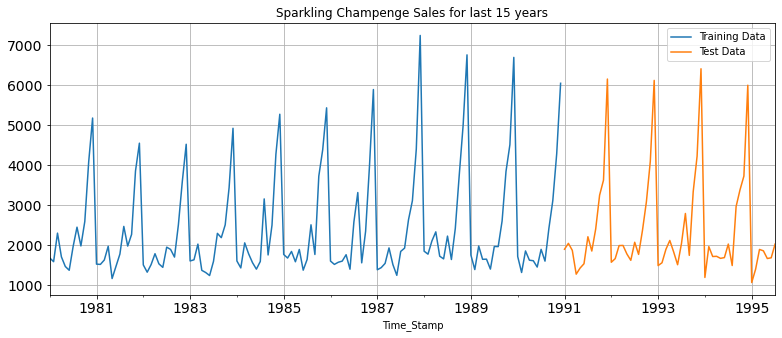

In [34]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title("Sparkling Champenge Sales for last 15 years")
plt.show()

### 4.Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE. 16

##### 1.Simple Exponential Smoothing

In [39]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [40]:
SES_train = train.copy()
SES_test = test.copy()

In [41]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

In [42]:
model_SES_autofit = model_SES.fit(optimized=True)

In [43]:
# The parameters of Model Simple Exponential Smoothing 
model_SES_autofit.params

{'smoothing_level': 0.04960659880745982,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047538435374,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [44]:
# Now lets predict on the test data

SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
pd.options.display.float_format = '{:.2f}'.format
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.93
1991-02-28,2049,2724.93
1991-03-31,1874,2724.93
1991-04-30,1279,2724.93
1991-05-31,1432,2724.93


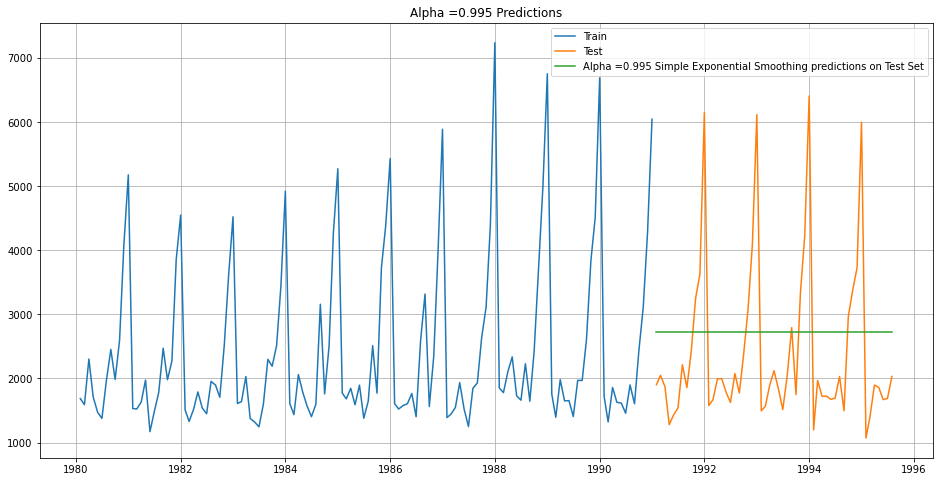

In [45]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

Model Evaluation for 𝛼 = 0.995 : Simple Exponential Smoothing

In [46]:
# Test Data
from sklearn import metrics
rmse_model1_test_1 = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model1_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 1316.035


In [47]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test_1]},index=['Alpha=0.995,Simple Exponential Model'])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03


Setting different alpha values. Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again. We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [48]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_2 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2

,Alpha Values,Train RMSE,Test RMSE


In [49]:
for i in np.arange(0.3,1.1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

##### Model Evaluation

In [50]:
resultsDf_2.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.30,1359.51,1935.51
1,0.40,1352.59,2311.92
2,0.50,1344.00,2666.35
3,0.60,1338.81,2979.20
4,0.70,1338.84,3249.94
5,0.80,1344.46,3483.80
6,0.90,1355.72,3686.79
7,1.00,1373.08,3864.28


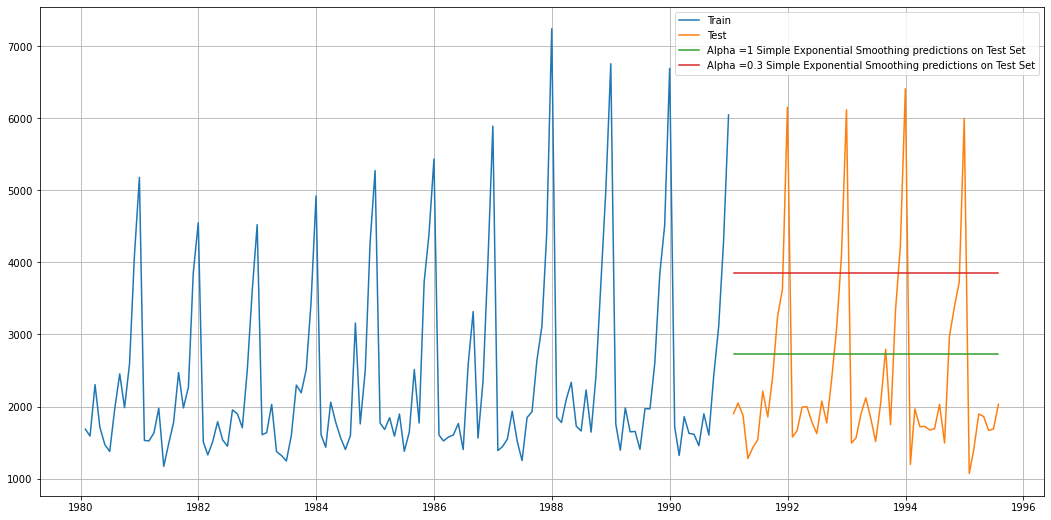

In [51]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.3], label='Alpha =0.3 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [52]:
resultsDf_1_3 = pd.DataFrame({'Test RMSE': [resultsDf_2.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                           ,index=['Alpha=0.3,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_1_3])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51


#### Model 2 : Double Exponential Smoothing (Holt's Model)

Two parameters 𝛼 and 𝛽 are estimated in this model. Level and Trend are accounted for in this model.

In [53]:
DES_train = train.copy()
DES_test = test.copy()

In [54]:
model_DES = Holt(DES_train['Sparkling'])

In [55]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_2

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [56]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model2_train = metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False)
        
        rmse_model2_test = metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False)
        
        resultsDf_2 = resultsDf_2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model2_train
                                          ,'Test RMSE':rmse_model2_test}, ignore_index=True)

In [57]:
resultsDf_2

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.30,0.30,1592.29,18259.11
1,0.30,0.40,1682.57,26069.84
2,0.30,0.50,1771.71,34401.51
3,0.30,0.60,1848.58,42162.75
4,0.30,0.70,1899.95,47832.40
...,...,...,...,...
59,1.00,0.60,1753.40,49327.09
60,1.00,0.70,1825.19,52655.77
61,1.00,0.80,1902.01,55442.27
62,1.00,0.90,1985.37,57823.18


In [58]:
# Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.
resultsDf_2.sort_values('Test RMSE',ascending=True).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.30,0.30,1592.29,18259.11
8,0.40,0.30,1569.34,23878.50
1,0.30,0.40,1682.57,26069.84
16,0.50,0.30,1530.58,27095.53
24,0.60,0.30,1506.45,29070.72


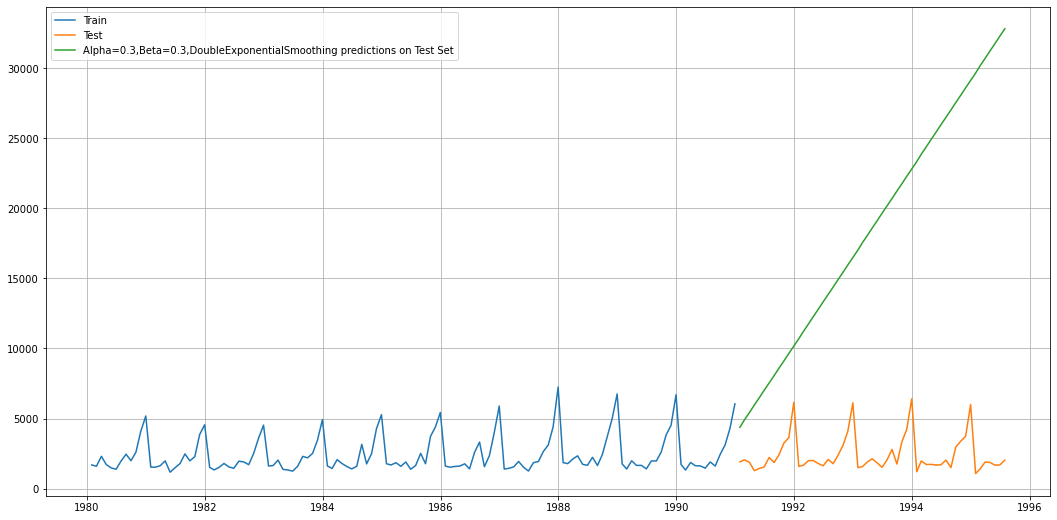

In [59]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')

plt.plot(DES_test['predict', 0.3, 0.3], label='Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [60]:
resultsDf_2_1 = pd.DataFrame({'Test RMSE': [resultsDf_2.sort_values(by=['Test RMSE']).values[0][3]]}
                           ,index=['Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_2_1])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11


#### Method 3: Triple Exponential Smoothing (Holt - Winter's Model)

Three parameters 𝛼 , 𝛽 and 𝛾 are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [61]:
TES_train = train.copy()
TES_test = test.copy()

In [62]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='multiplicative',freq='M')

In [63]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [64]:
model_TES_autofit.params

{'smoothing_level': 0.11110109539432127,
 'smoothing_trend': 0.06155956038741422,
 'smoothing_seasonal': 0.39402402538387826,
 'damping_trend': nan,
 'initial_level': 1637.1063954979618,
 'initial_trend': -9.145552698252029,
 'initial_seasons': array([1.05835222, 1.01510513, 1.40303179, 1.19830843, 0.96806777,
        0.97034883, 1.32237078, 1.70460903, 1.37084089, 1.80737708,
        2.83425686, 3.61646361]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,Sparkling,auto_predict
Time_Stamp,,
1991-01-31,1902,1577.39
1991-02-28,2049,1334.20
1991-03-31,1874,1746.25
1991-04-30,1279,1630.97
1991-05-31,1432,1523.58


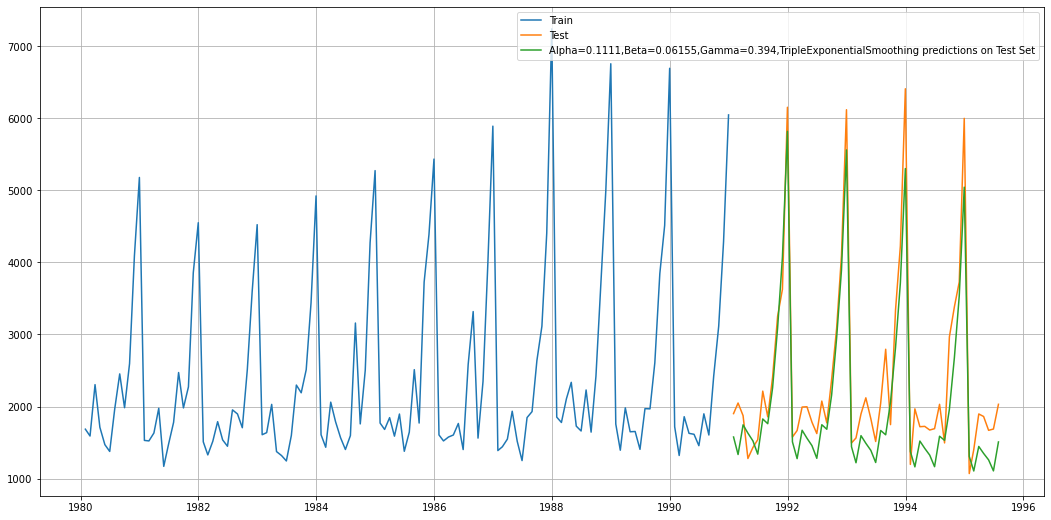

In [66]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [67]:
## Test Data

rmse_model3_test_1 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['auto_predict'],squared=False)
print("For Alpha=0.1111,Beta=0.06155,Gamma=0.394, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test_1))

For Alpha=0.1111,Beta=0.06155,Gamma=0.394, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 468.758


In [68]:
resultsDf_3_1 = pd.DataFrame({'Test RMSE': [rmse_model3_test_1]}
                           ,index=['Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing'])
resultsDf = pd.concat([resultsDf, resultsDf_3_1])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76


In [69]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_3_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_3_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [70]:
for i in np.arange(0.3,1.1,0.1):
    for j in np.arange(0.3,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_model3_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model3_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_3_2 = resultsDf_3_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model3_train,'Test RMSE':rmse_model3_test}
                                                 , ignore_index=True)

In [71]:
resultsDf_3_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.30,0.30,0.30,404.51,392.79
1,0.30,0.30,0.40,402.09,951.32
2,0.30,0.30,0.50,408.28,1470.49
3,0.30,0.30,0.60,428.63,2181.72
4,0.30,0.30,0.70,468.96,3513.35
...,...,...,...,...,...
507,1.00,1.00,0.60,153394.79,798978.97
508,1.00,1.00,0.70,94040.96,1074413.37
509,1.00,1.00,0.80,102196.95,5010607.40
510,1.00,1.00,0.90,77924.29,431826.51


In [72]:
resultsDf_3_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.30,0.30,0.30,404.51,392.79
8,0.30,0.40,0.30,424.83,410.85
65,0.40,0.30,0.40,435.55,421.41
296,0.70,0.80,0.30,700.32,518.19
130,0.50,0.30,0.50,498.24,542.18


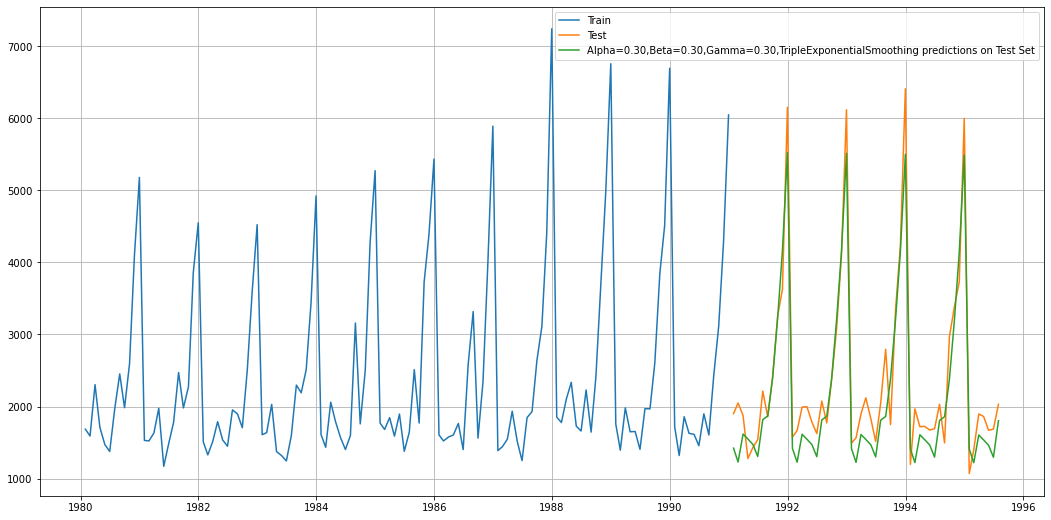

In [73]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.30, 0.30, 0.30], label='Alpha=0.30,Beta=0.30,Gamma=0.30,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [74]:
resultsDf_3_2 = pd.DataFrame({'Test RMSE': [resultsDf_3_2.sort_values(by=['Test RMSE']).values[0][4]]}
                           ,index=['Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_3_2])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79


In [75]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11


For this data, we had both trend and seasonality so by definition Triple Exponential Smoothing is supposed to work better than the Simple Exponential Smoothing as well as the Double Exponential Smoothing

Lets Build Other Models Also

#### Model 4: Linear Regression

For this particular linear regression, we are going to regress the 'Sales-Sparkling' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression

In [76]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [77]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [78]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



Now that our training and test data has been modified, let us go ahead use Linear regression to build the model on the training data and test the model on the test data.

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

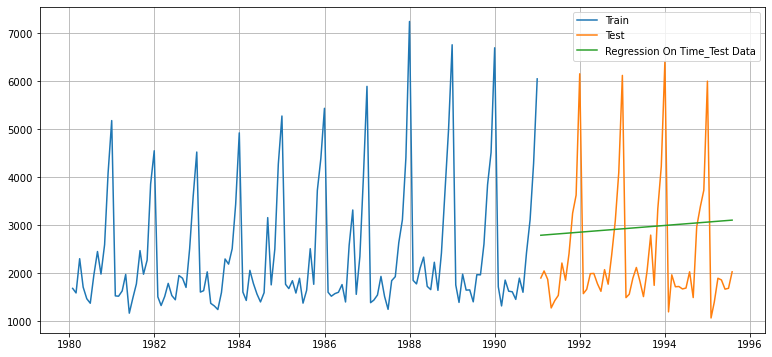

In [82]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

#### Model Evaluation

In [83]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [84]:
resultsDf_4_1 = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['RegressionOnTime'])
resultsDf = pd.concat([resultsDf, resultsDf_4_1])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14


#### Model 5: Naive Approach:  $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [85]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [86]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

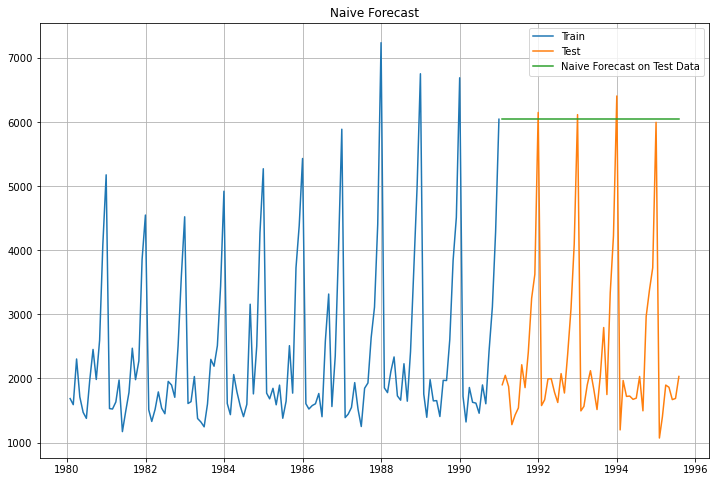

In [87]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [88]:
## Test Data - RMSE

rmse_model5_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model5_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [89]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14
NaiveModel,3864.28


#### Model 6: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [90]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [91]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.78
1991-02-28,2049,2403.78
1991-03-31,1874,2403.78
1991-04-30,1279,2403.78
1991-05-31,1432,2403.78


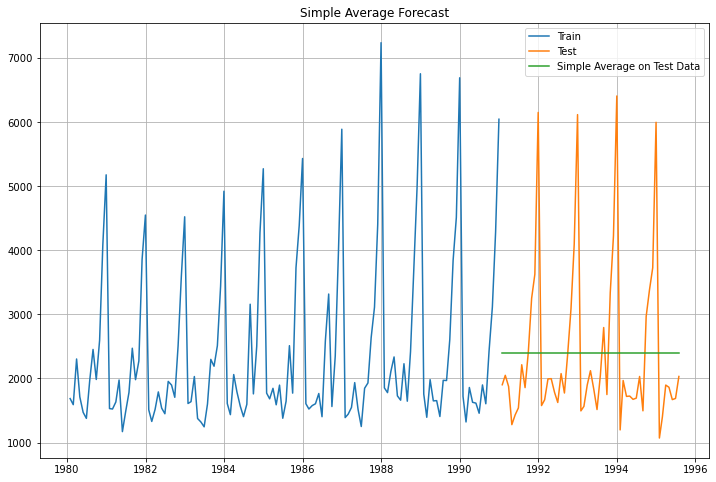

In [92]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Simple Average-Model Evaluation

In [93]:
## Test Data - RMSE 

rmse_model6_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [94]:
resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14
NaiveModel,3864.28
SimpleAverageModel,1275.08


#### Method 7: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [95]:
MovingAverage = df_spark.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


#### Trailing moving averages

In [96]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,nan,nan,nan,nan
1980-02-29,1591,1638.50,nan,nan,nan
1980-03-31,2304,1947.50,nan,nan,nan
1980-04-30,1712,2008.00,1823.25,nan,nan
1980-05-31,1471,1591.50,1769.50,nan,nan


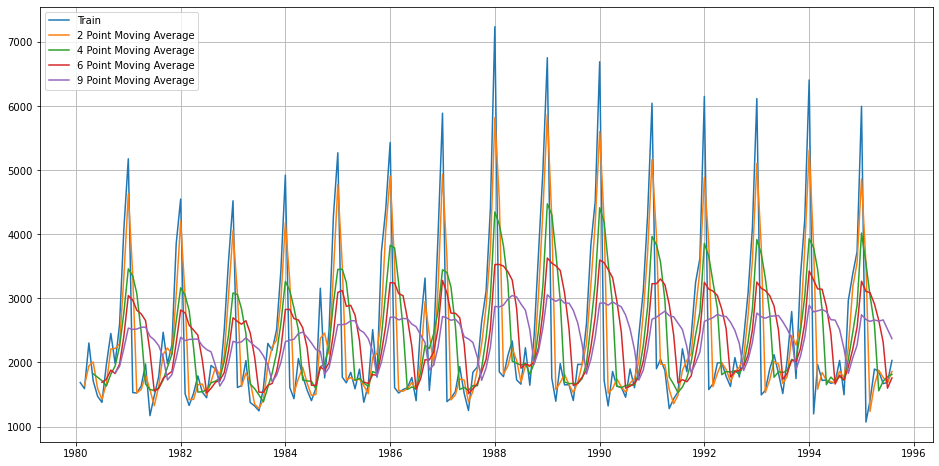

In [97]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [98]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.709677)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.709677):]

In [99]:
MovingAverage.count()

Sparkling     187
Trailing_2    186
Trailing_4    184
Trailing_6    182
Trailing_9    179
dtype: int64

In [100]:
trailing_MovingAverage_test.count()

Sparkling     55
Trailing_2    55
Trailing_4    55
Trailing_6    55
Trailing_9    55
dtype: int64

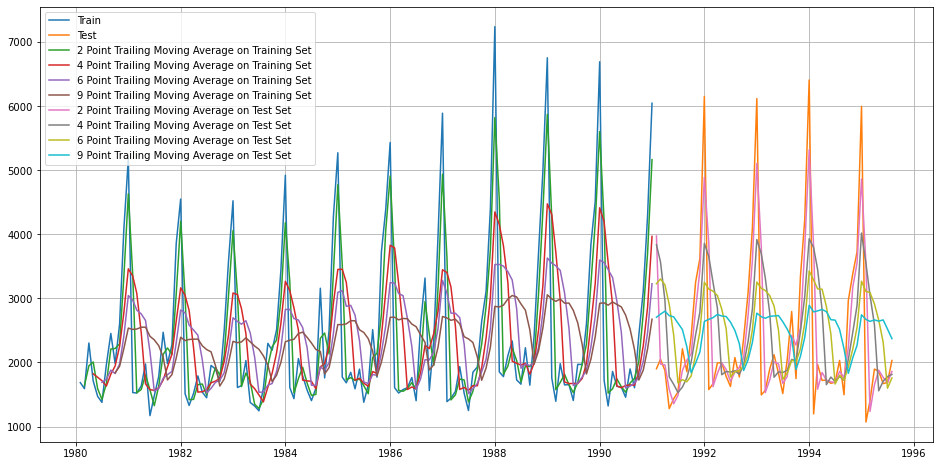

In [101]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

#### Model Evaluation - Done on Test data

In [102]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model7_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model7_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model7_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model7_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model7_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model7_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [103]:
resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test_2,rmse_model7_test_4
                                          ,rmse_model7_test_6,rmse_model7_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14
NaiveModel,3864.28
SimpleAverageModel,1275.08
2pointTrailingMovingAverage,813.40
4pointTrailingMovingAverage,1156.59


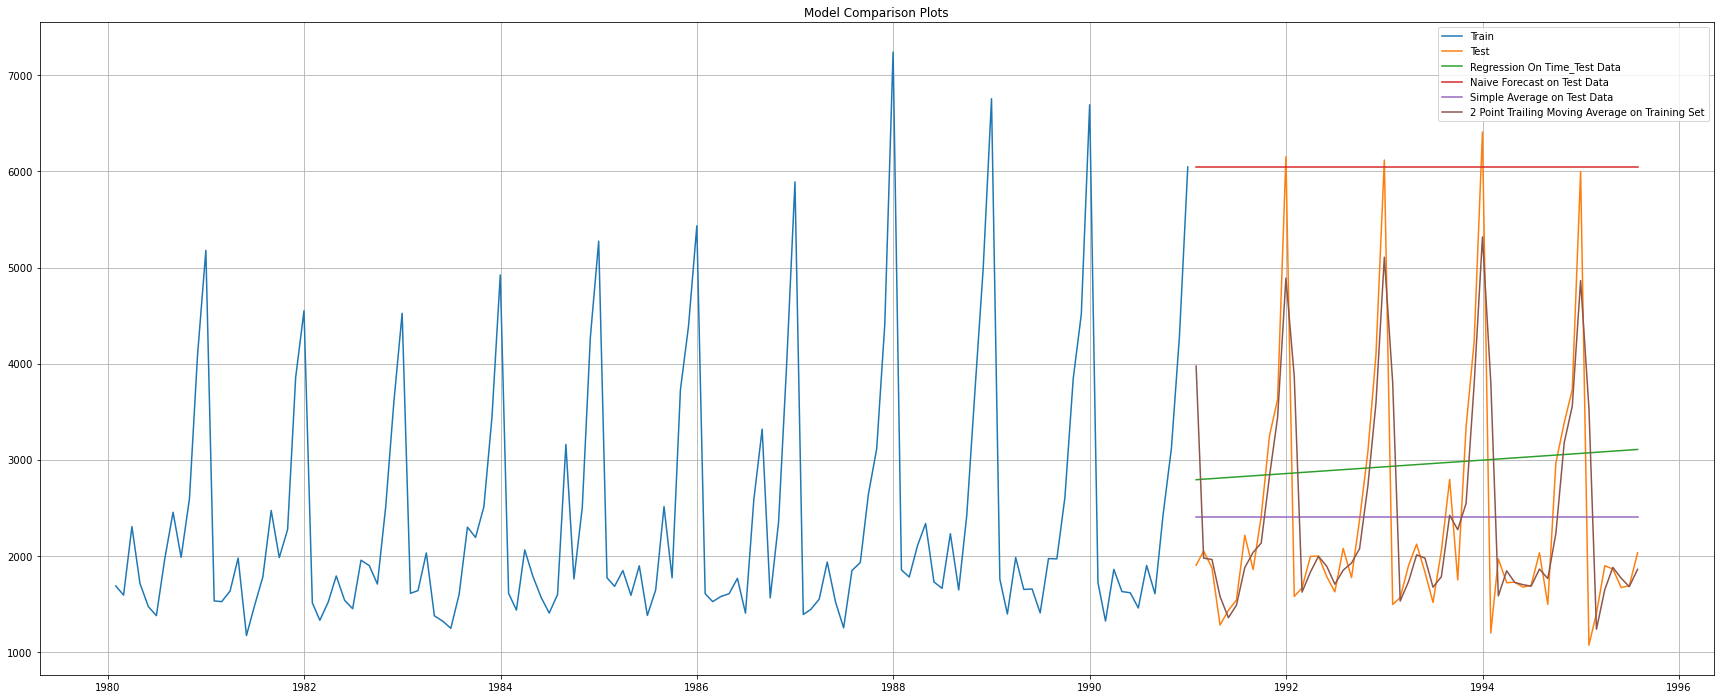

In [104]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

In [105]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
2pointTrailingMovingAverage,813.40
4pointTrailingMovingAverage,1156.59
SimpleAverageModel,1275.08
6pointTrailingMovingAverage,1283.93
"Alpha=0.995,Simple Exponential Model",1316.03
9pointTrailingMovingAverage,1346.28
RegressionOnTime,1389.14
"Alpha=0.3,SimpleExponentialSmoothing",1935.51


### 5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

Dicky Fuller Test

Null Hypothesis H0- Series is not Stationary

Alternative Hypothesis H1- Series is Stationary

In [106]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False) ## You plot will stay open - will be seen always
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

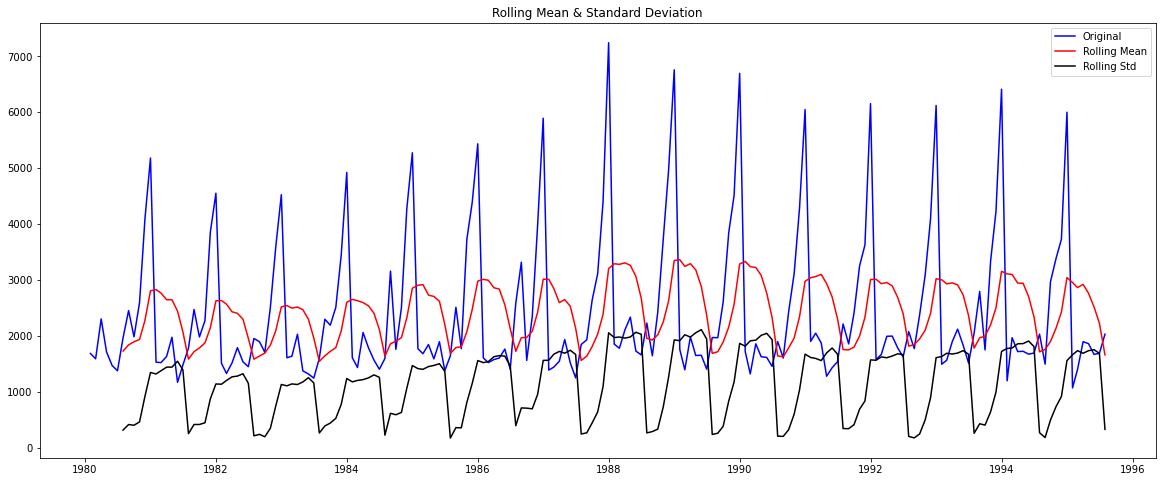

Results of Dickey-Fuller Test:
Test Statistic                 -1.36
p-value                         0.60
#Lags Used                     11.00
Number of Observations Used   175.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [107]:
test_stationarity(df_spark['Sparkling'])

P value is high, it means null will fly, Null hypothesis is true. It means time series is not stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not

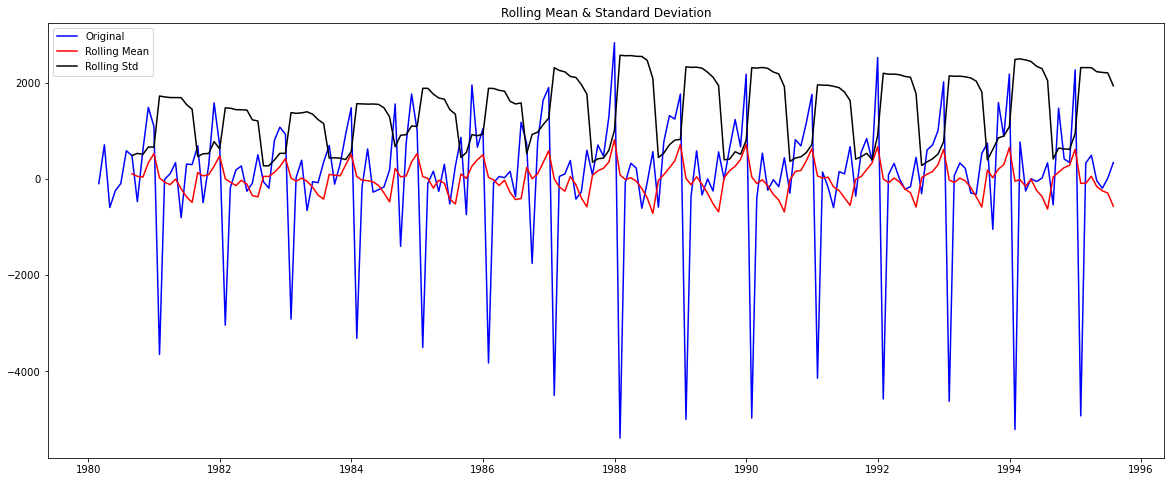

Results of Dickey-Fuller Test:
Test Statistic                -45.05
p-value                         0.00
#Lags Used                     10.00
Number of Observations Used   175.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [108]:
test_stationarity(df_spark['Sparkling'].diff().dropna())

After taking difference of order 1, We see that at 𝛼 = 0.05 the Time Series is indeed stationary.

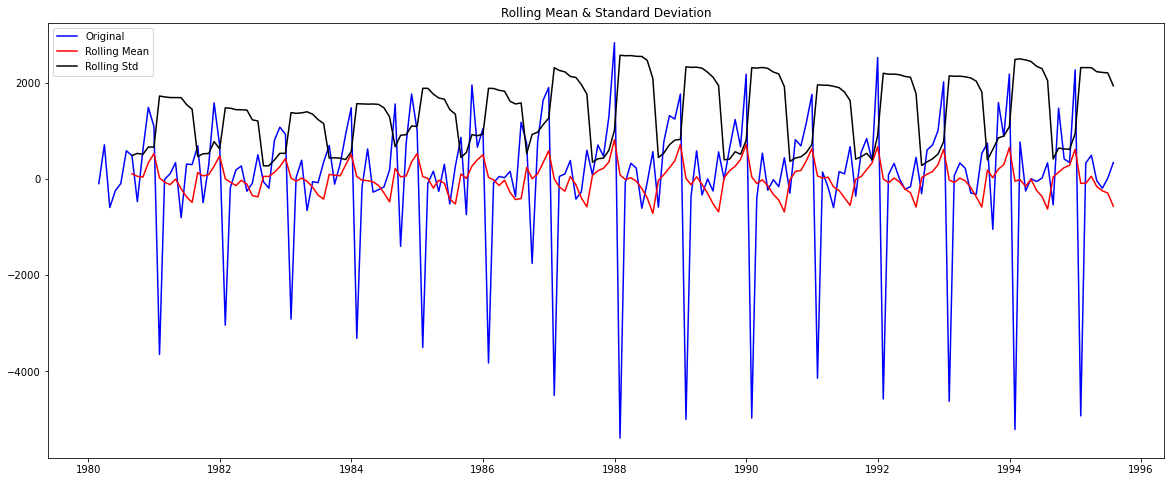

Results of Dickey-Fuller Test:
Test Statistic                -45.05
p-value                         0.00
#Lags Used                     10.00
Number of Observations Used   175.00
Critical Value (1%)            -3.47
Critical Value (5%)            -2.88
Critical Value (10%)           -2.58
dtype: float64 



In [109]:
test_stationarity(df_spark['Sparkling'].diff().dropna())

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE. 8

#### Automated Version of ARIMA

In [110]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [111]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [112]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.906436993431
ARIMA(0, 1, 2) - AIC:2232.7830976843675
ARIMA(1, 1, 0) - AIC:2268.5280605652692
ARIMA(1, 1, 1) - AIC:2235.0139453492384
ARIMA(1, 1, 2) - AIC:2233.5976471203803
ARIMA(2, 1, 0) - AIC:2262.035600101831
ARIMA(2, 1, 1) - AIC:2232.3604898820927
ARIMA(2, 1, 2) - AIC:2210.6165947934273


In [113]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2210.62
7,"(2, 1, 1)",2232.36
2,"(0, 1, 2)",2232.78
5,"(1, 1, 2)",2233.60
4,"(1, 1, 1)",2235.01
6,"(2, 1, 0)",2262.04
1,"(0, 1, 1)",2264.91
3,"(1, 1, 0)",2268.53
0,"(0, 1, 0)",2269.58


In [114]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1011.613
Date:                Tue, 22 Jun 2021   AIC                           2210.617
Time:                        12:08:24   BIC                           2227.868
Sample:                    02-29-1980   HQIC                          2217.627
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5861      0.516     10.825      0.000       4.575       6.597
ar.L1.D.Sparkling     1.2699      0.074     17.047      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

#### Predict on the Test Set using this model and evaluate the model.

In [115]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [116]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1375.2554790798517


In [117]:
resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_8

,Test RMSE
"ARIMA(2,1,2)",1375.26


In [118]:
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14
NaiveModel,3864.28
SimpleAverageModel,1275.08
2pointTrailingMovingAverage,813.40
4pointTrailingMovingAverage,1156.59


#### Automated Version of SARIMA

In [147]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 3
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [148]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [149]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616843434
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640234018
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301372658
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873594053
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054160641428
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898054509806
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864961156
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572831896
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881789094
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0973022181906
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319654388767
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954497622
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245088874893
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683740414124
SARIMA(0, 1, 

In [150]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.58
53,"(1, 1, 2)","(2, 0, 2, 12)",1556.08
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.12
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.16
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.34


In [151]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Tue, 22 Jun 2021   AIC                           1555.584
Time:                                    13:40:38   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6279      0.255     -2.461      0.014      -1.128      -0.128
ma.L1         -0.1042      0.225   

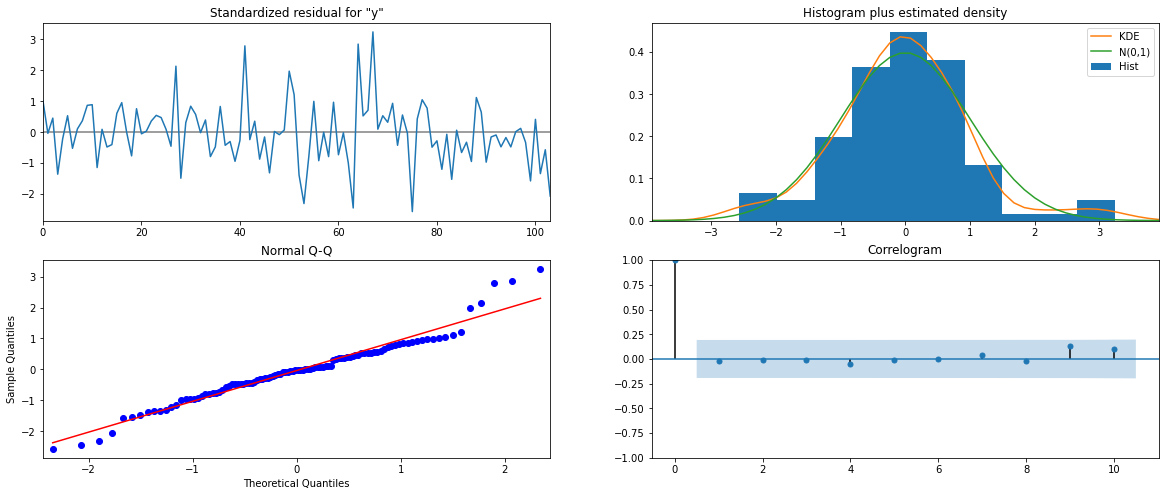

In [152]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [153]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [154]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1327.34,388.36,566.17,2088.51
1,1315.07,402.03,527.10,2103.03
2,1621.60,402.02,833.65,2409.55
3,1598.81,407.26,800.59,2397.02
4,1392.71,407.99,593.06,2192.36


In [155]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6428629327565


In [156]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(1,0,2,12)'])


In [157]:
resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14
NaiveModel,3864.28
SimpleAverageModel,1275.08
2pointTrailingMovingAverage,813.40
4pointTrailingMovingAverage,1156.59


## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE. 8

##### ARIMA Model based on ACF and PACF

Let us look at the ACF and the PACF plots

In [158]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1440x864 with 0 Axes>

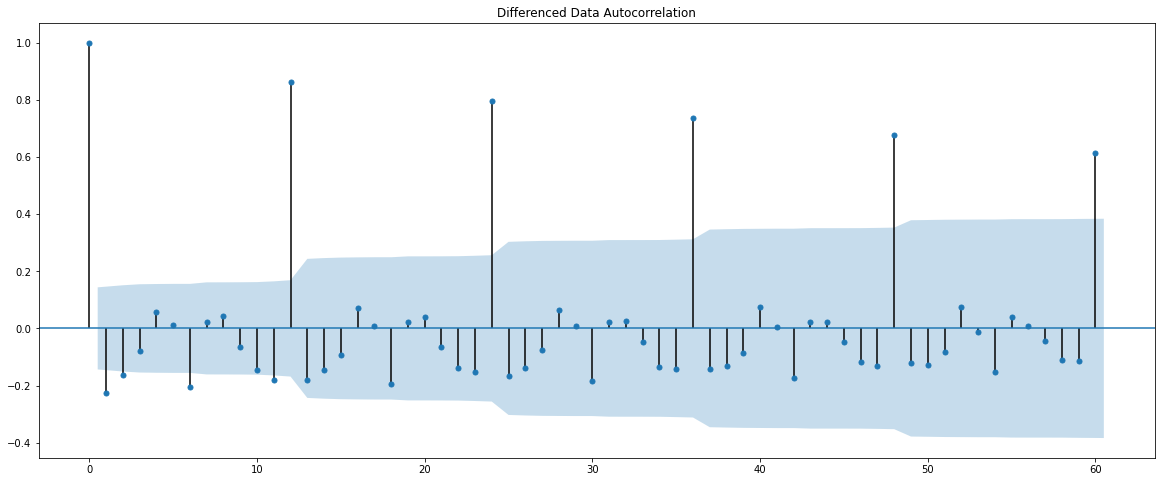

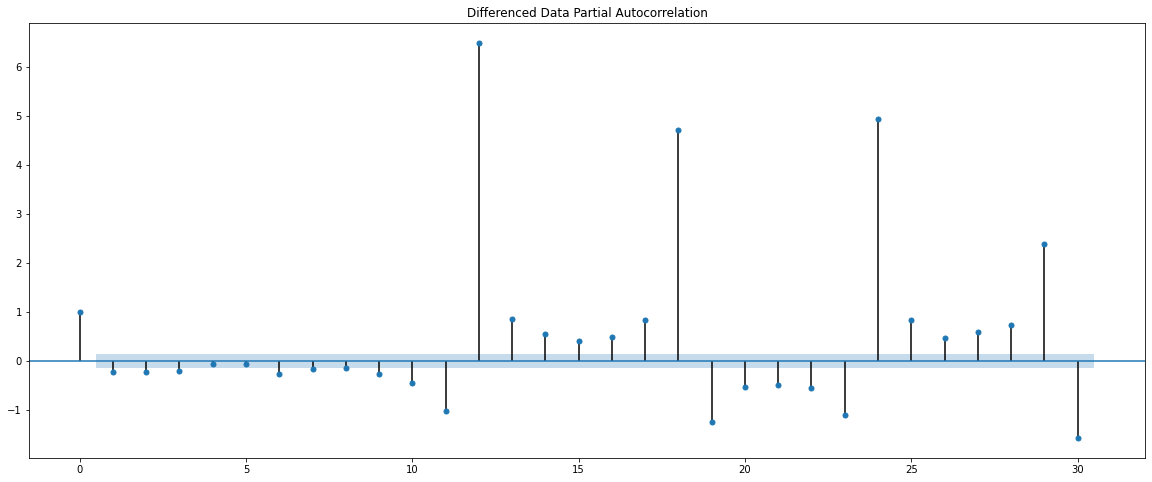

In [159]:
plt.figure(figsize=(20,12))
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=60,title='Differenced Data Autocorrelation')
plot_pacf(df_spark['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0. The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0. By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at lag 3 and 2.

In [160]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(3,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1107.465
Method:                       css-mle   S.D. of innovations           1106.521
Date:                Tue, 22 Jun 2021   AIC                           2228.930
Time:                        13:42:16   BIC                           2249.057
Sample:                    02-29-1980   HQIC                          2237.108
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.8937      3.643      1.618      0.106      -1.246      13.033
ar.L1.D.Sparkling    -0.4420   8.84e-05  -5002.292      0.000      -0.442      -0.442
ar.L2.D.Sparkling     0.

#### Predict on the Test Set using this model and evaluate the model.

In [161]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [162]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1375.8554465504344


In [163]:
temp_resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(3,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_2])

resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14
NaiveModel,3864.28
SimpleAverageModel,1275.08
2pointTrailingMovingAverage,813.40
4pointTrailingMovingAverage,1156.59


#### SARIMA Model : Manually looking at ACF and PACF

Let us look at the ACF and the PACF plots once more.

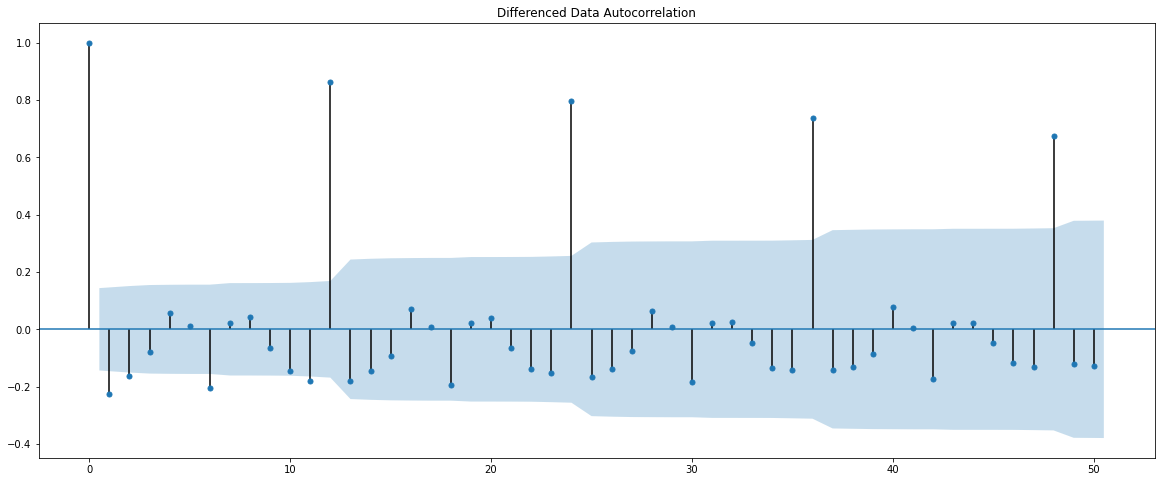

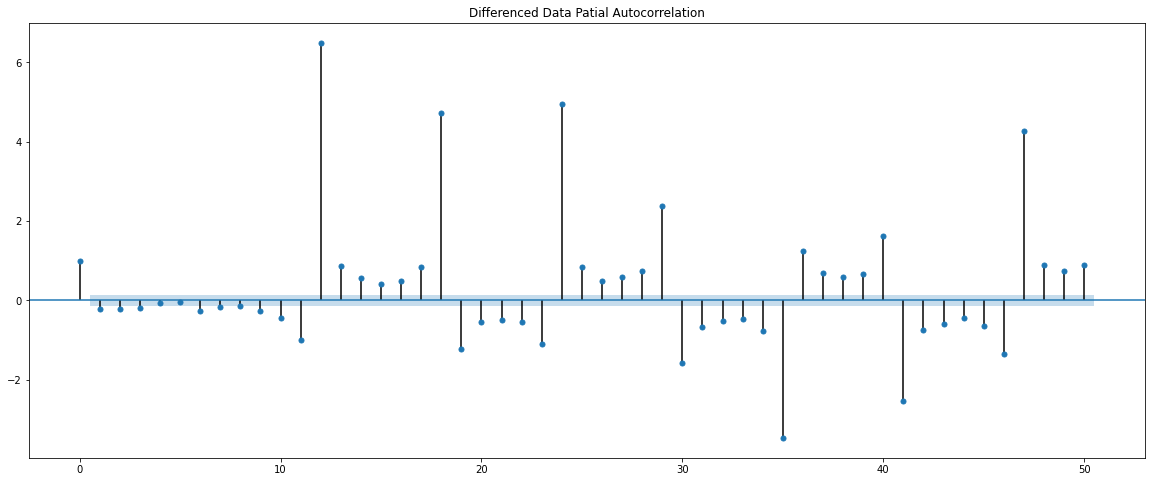

In [164]:
plot_acf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_spark['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

In [165]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood                -598.630
Date:                            Tue, 22 Jun 2021   AIC                           1219.260
Time:                                    13:42:41   BIC                           1245.462
Sample:                                         0   HQIC                          1229.765
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7555      0.151     -5.008      0.000      -1.051      -0.460
ar.L2          0.1169      0.185   

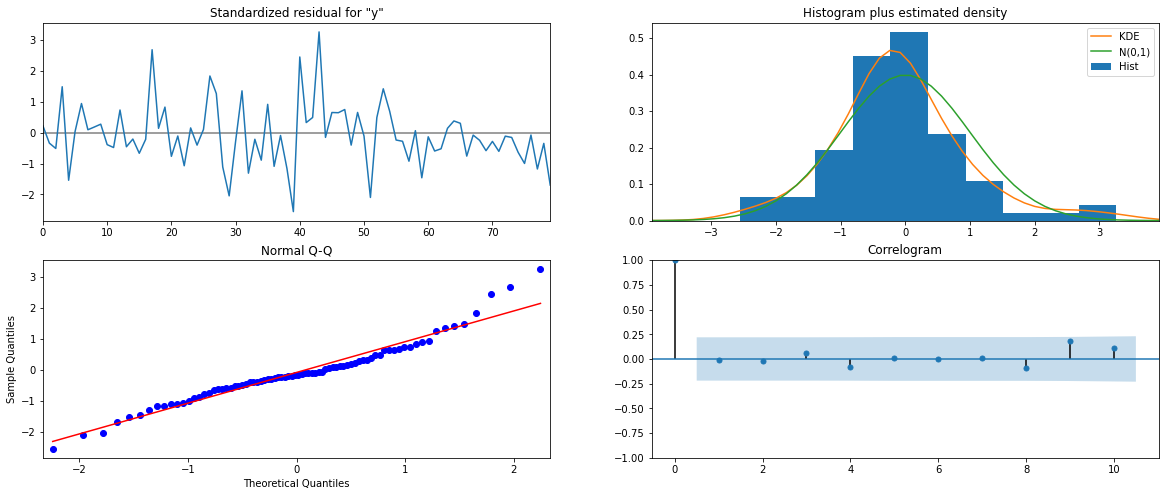

In [166]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [167]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [168]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1510.10,425.19,676.73,2343.47
1,1431.60,440.19,568.84,2294.35
2,1850.32,440.26,987.42,2713.21
3,1781.85,441.01,917.49,2646.21
4,1550.30,441.00,685.96,2414.64


In [169]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

329.55829695570554


In [170]:
temp_resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(3,1,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_3])


resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14
NaiveModel,3864.28
SimpleAverageModel,1275.08
2pointTrailingMovingAverage,813.40
4pointTrailingMovingAverage,1156.59


### 8.Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data. 2

In [171]:
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14
NaiveModel,3864.28
SimpleAverageModel,1275.08
2pointTrailingMovingAverage,813.40
4pointTrailingMovingAverage,1156.59


## 9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands. 3

#### Building the most optimum model on the Full Data.

In [174]:
full_data_model = sm.tsa.statespace.SARIMAX(df_spark['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(3, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 2)x(3, 1, 2, 12)   Log Likelihood               -1000.243
Date:                            Tue, 22 Jun 2021   AIC                           2022.487
Time:                                    13:47:56   BIC                           2054.445
Sample:                                01-31-1980   HQIC                          2035.473
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8609      0.090     -9.545      0.000      -1.038      -0.684
ar.L2          0.0119      0.129   

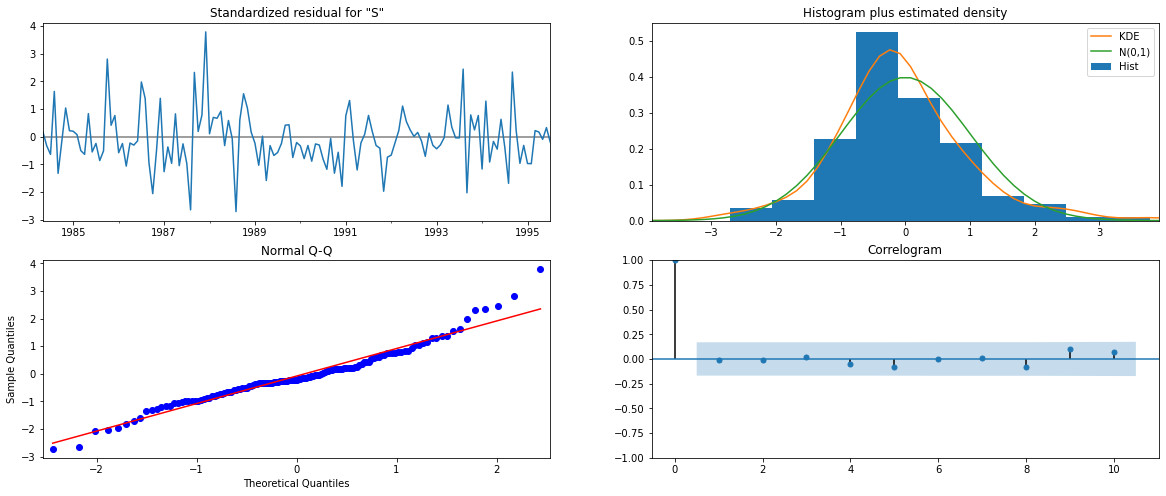

In [175]:
results_full_data_model.plot_diagnostics();

###### predict 12 months into the future

In [177]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [180]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,1868.69,396.48,1091.60,2645.78
1995-09-30,2511.36,401.84,1723.76,3298.95
1995-10-31,3272.65,402.69,2483.40,4061.90
1995-11-30,3874.44,403.10,3084.38,4664.50
1995-12-31,6098.96,403.12,5308.85,6889.06
1996-01-31,1191.82,403.83,400.33,1983.31
1996-02-29,1557.11,403.84,765.59,2348.62
1996-03-31,1872.46,404.46,1079.73,2665.19
1996-04-30,1851.38,404.48,1058.61,2644.15
1996-05-31,1719.85,405.06,925.94,2513.76


In [179]:
rmse = mean_squared_error(df_spark['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 578.9516037053722


In [181]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

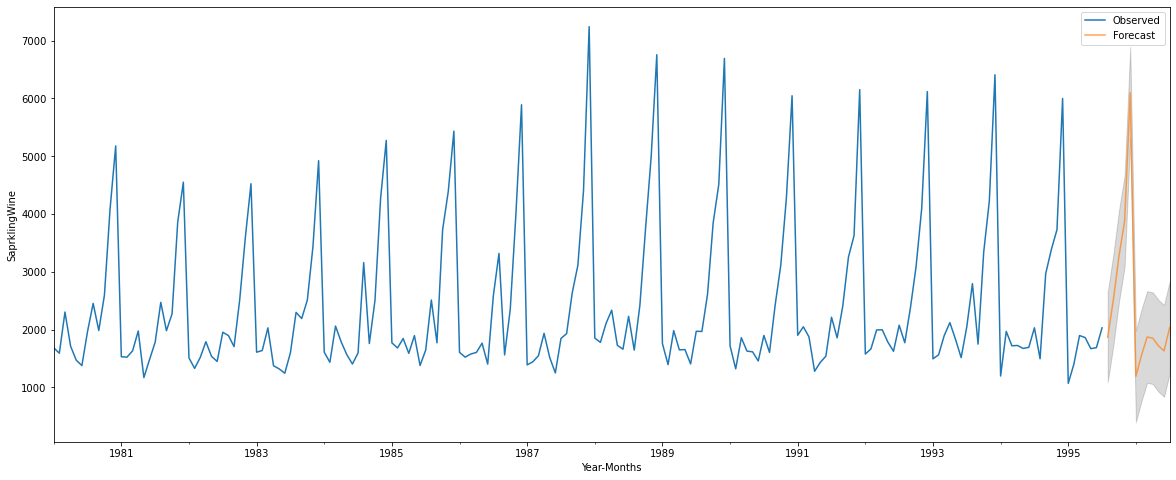

In [182]:
# plot the forecast along with the confidence band

axis = df_spark['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('SaprklingWine')
plt.legend(loc='best')
plt.show()

In [184]:
resultsDf

,Test RMSE
"Alpha=0.995,Simple Exponential Model",1316.03
"Alpha=0.3,SimpleExponentialSmoothing",1935.51
"Alpha=0.3,Beta=0.3,DoubleExponentialSmoothing",18259.11
"Alpha=0.1111,Beta=0.06155,Gamma=0.394,TripleExponentialSmoothing",468.76
"Alpha=0.3,Beta=0.3,Gamma=0.3,TripleExponentialSmoothing",392.79
RegressionOnTime,1389.14
NaiveModel,3864.28
SimpleAverageModel,1275.08
2pointTrailingMovingAverage,813.40
4pointTrailingMovingAverage,1156.59


### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales. Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present. 5 

To Analyse the sales of Sparkling Wine we got hidden insights by performing Exploaratory Data Analysis.
We performed EDA then we get to know

1.From 1981 to 1987 trend is upward, but from 1987 is both upward and downward.

2.Median Value of Sales are remains around 2000.

3.Highest Sales of Sparkling wine is occurred in year 1987, and in 1995 one of the month has brought Lowest sale of wines.

4.From Monthly plot, Sales has been Increasd from August to December. Till this point Sales are around 2000. so We need    Higher stock or Production from August to December. October,November,December has sales more than 2000 and it is almost equal to 3000,4000,6000.

5.In month of december atleast we need 7242 Sparkling wines in stock as this is the highest number reached.

After Decomposition it is clear that Series has Trend and Seasonality both.

So we Applied the models like Simple, Double, Triple Exponential Smoothing to the Train data till 1991. and then tested it on Test data. Out of these Triple exponential smoothing seems to be quite effective as the series has all three factors Alpha, Beta, gamma. Season, trend and level. The RMSE is low for Triple exponential smoothing.

Further we have applied models like Linear Regression and Naive Bayes, per as we can see in the Dignostics it failed to predict sales, and RMSE is also high for these models.

After We moved to the models like Simple and Trailing Moving Average.This time it was little better than Linear Regression and Naive Bayes.

After That Finally we Applied ARIMA and SARIMA Automated by AIC scores and Manual ARIMA SARIMA by observing ACF and PACF plots. PACF has given p value while ACF has given as q value.

The series has Seasonality hence The best suited Model was SARIMA, Only 329 RMSE on the Test Data, and When Applied on Full data it has given RMSE 578, Which is still good as compare to Others.So we Finalise This Model.
Here we have taken P as 3 and Q as 2, D=1 as we got stationary series after one order differencing.

Finally We Predict Sales for Next 12 Months, And in December we will need 6099 Sparkling wines atleast to fulfill the requirement.

In Future Company Should be ready with the Stock of the Year,Company should hire staff as per the Requirement.
If Company is producing wines for December then they must be think of manpower required. Excess Production might hamper the Business, so as predicted Company should Target.

If Company want to Increase Revenue, then they have to Think for all year instead of focussing only on December.





### THE END